In [1]:
import pandas as pd
import numpy as np
import sys
import pickle
import glob
import os
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# load the classifier
CLASSIFIER_FILE_NAME = '/Users/darylwilding-mcbride/Downloads/experiments/YHE/target-decoy-models/target-decoy-classifier.pkl'
with open(CLASSIFIER_FILE_NAME, 'rb') as file:
    best_estimator = pickle.load(file)

In [3]:
params = best_estimator.get_params()

In [4]:
feature_names = np.load('/Users/darylwilding-mcbride/Downloads/experiments/YHE/target-decoy-models/feature_names.npy')

In [5]:
best_estimator.classes_

array(['decoy', 'target'], dtype=object)

In [6]:
# load the train set
X_train = np.load('/Users/darylwilding-mcbride/Downloads/experiments/YHE/target-decoy-models/X_train.npy')
y_train = np.load('/Users/darylwilding-mcbride/Downloads/experiments/YHE/target-decoy-models/y_train.npy', allow_pickle=True)

In [7]:
# load the test set
X_test = np.load('/Users/darylwilding-mcbride/Downloads/experiments/YHE/target-decoy-models/X_test.npy')
y_test = np.load('/Users/darylwilding-mcbride/Downloads/experiments/YHE/target-decoy-models/y_test.npy', allow_pickle=True)

In [8]:
y_train_1 = [0 if x == 'decoy' else 1 for x in y_train]
y_test_1 = [0 if x == 'decoy' else 1 for x in y_test]

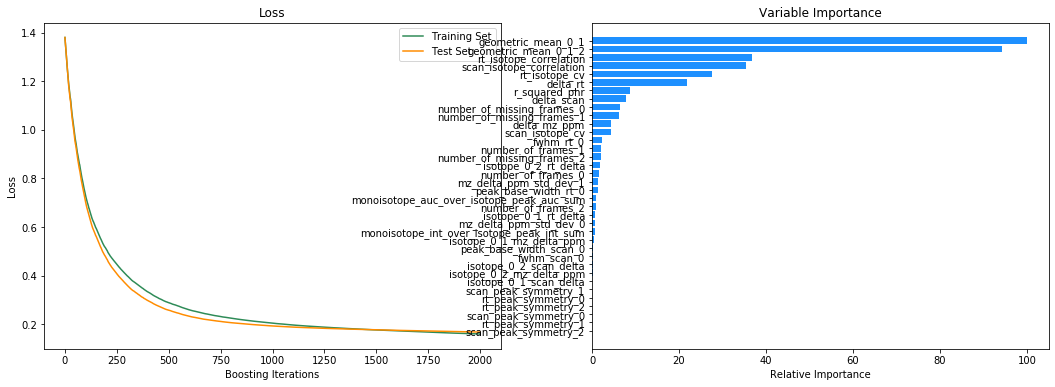

In [9]:
# Plot training loss
train_score = np.empty(len(best_estimator.estimators_))
test_score = np.empty(len(best_estimator.estimators_))

for i, pred in enumerate(best_estimator.staged_decision_function(X_test)):
    test_score[i] = best_estimator.loss_(y_test_1, pred)

for i, pred in enumerate(best_estimator.staged_decision_function(X_train)):
    train_score[i] = best_estimator.loss_(y_train_1, pred)
    
plt.figure(figsize=(18, 6))
plt.margins(0.06)
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(train_score, 'seagreen', label='Training Set')
plt.plot(test_score, 'darkorange', label='Test Set')
plt.legend(loc='best')
plt.xlabel('Boosting Iterations')
plt.ylabel('Loss')

# Plot feature importance
feature_importance = best_estimator.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center', color='dodgerblue')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()